In [1]:
import pandas as pd
import numpy as np

In [2]:
#先合并训练集和测试集，对数据进行预处理。
data = pd.read_csv("./data/2_train.csv", sep=';', index_col='id')
test = pd.read_csv("./data/2_test.csv", sep=';', index_col='id')
data.head(5).style
data_all = pd.concat([data, test], axis=0)
data_all

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
1,-,housemaid,married,basic.4y,.,no,?,telephone,may,NaN,...,-,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,57,services,married,high.school,NaN,no,no,telephone,may,.,...,1,999,0,?,1.1,93.994,-36.4,4.857,5191.0,no
3,37,services,NaN,high.school,no,?,no,telephone,may,NaN,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
5,56,services,married,high.school,no,no,yes,?,may,mon,...,1,999,?,NaN,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54114,30,admin.,-,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Withheld
54115,39,admin.,-,.,no,yes,no,.,jul,?,...,NaN,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,Withheld
54116,27,student,single,high.school,no,-,no,-,NaN,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,Withheld


In [3]:
data_all

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
1,-,housemaid,married,basic.4y,.,no,?,telephone,may,NaN,...,-,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,57,services,married,high.school,NaN,no,no,telephone,may,.,...,1,999,0,?,1.1,93.994,-36.4,4.857,5191.0,no
3,37,services,NaN,high.school,no,?,no,telephone,may,NaN,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
5,56,services,married,high.school,no,no,yes,?,may,mon,...,1,999,?,NaN,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54114,30,admin.,-,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Withheld
54115,39,admin.,-,.,no,yes,no,.,jul,?,...,NaN,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,Withheld
54116,27,student,single,high.school,no,-,no,-,NaN,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,Withheld


In [4]:
# 将非法值替换成空值
for x in ['-', '.', '?', 'nonexistent']:
    data_all.replace(x, np.nan, inplace=True)
data_all.head(5).style

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
1,nan,housemaid,married,basic.4y,nan,no,nan,telephone,may,nan,261,nan,999,0,nan,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,57,services,married,high.school,nan,no,no,telephone,may,nan,149,1,999,0,nan,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,37,services,nan,high.school,no,nan,no,telephone,may,nan,nan,1,999,0,nan,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nan,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
5,56,services,married,high.school,no,no,yes,nan,may,mon,307,1,999,nan,nan,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


<AxesSubplot:>

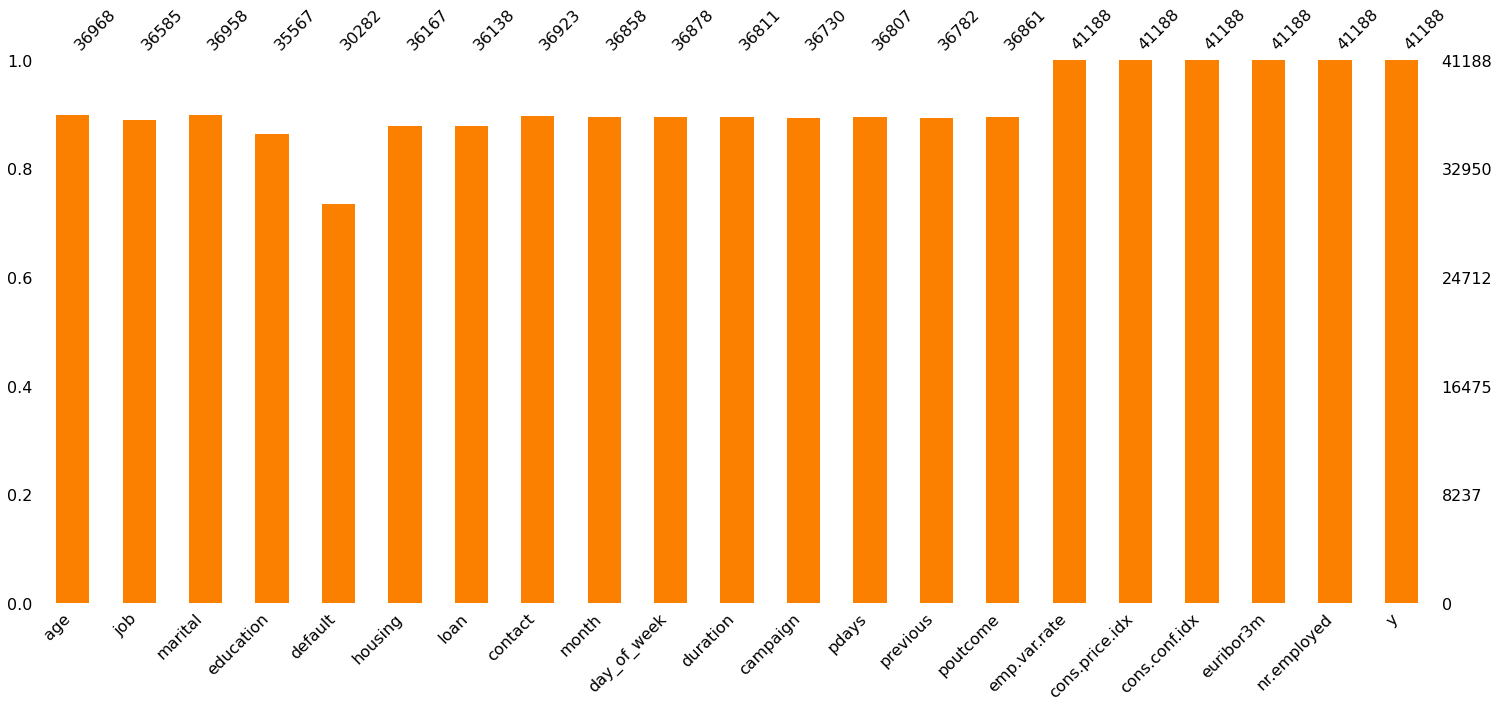

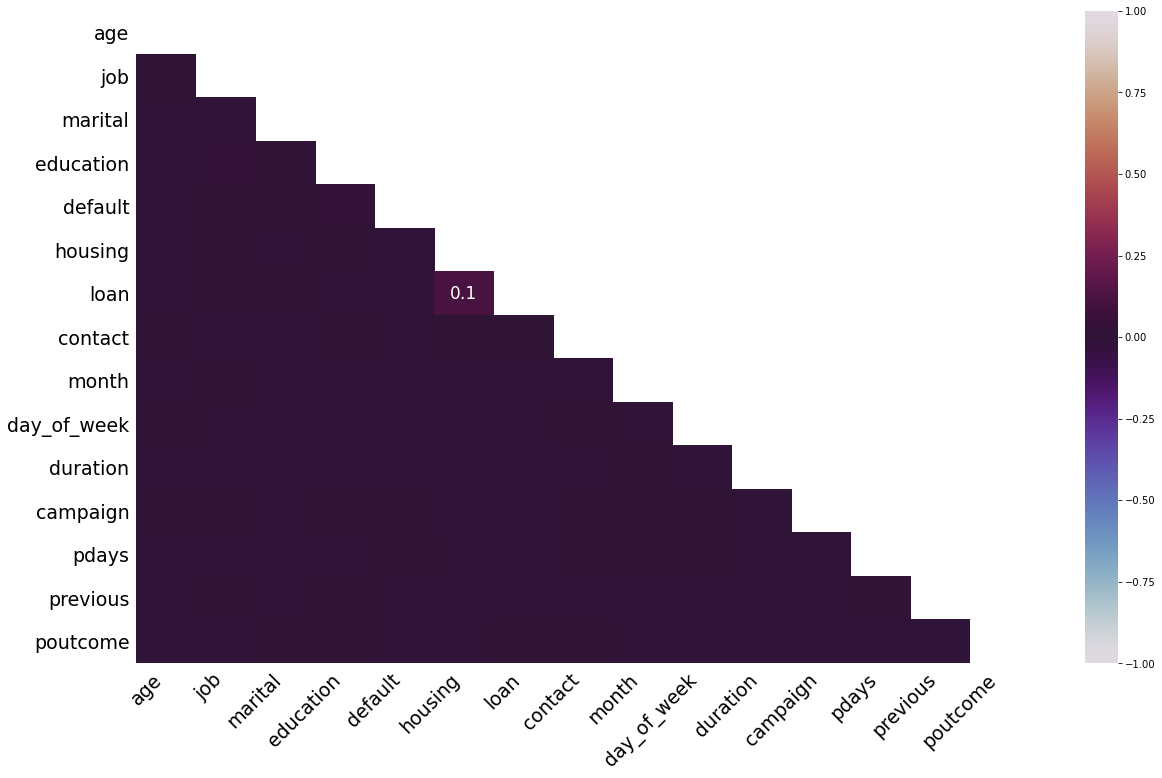

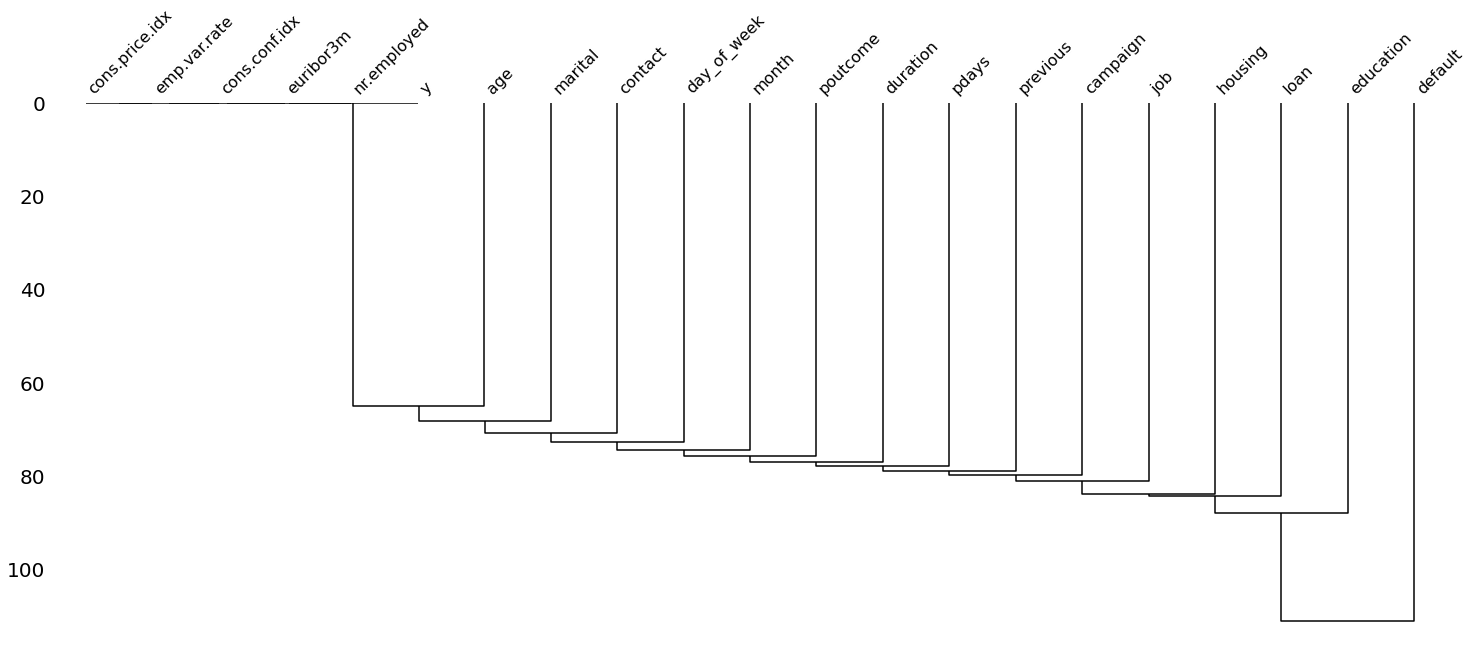

In [5]:
import missingno
# -----------缺失值描述-----------
missingno.bar(data,color=(0.99,0.5,0))
missingno.heatmap(data, fontsize=19, cmap='twilight')
missingno.dendrogram(data)

In [6]:
fill_month = data_all.loc[~data_all['month'].isnull(), ['month','cons.price.idx']].drop_duplicates().sort_values(by=['month'])
fill_month

,month,cons.price.idx
id,,
27974,apr,93.075
39395,apr,93.749
37118,aug,92.201
18823,aug,93.444
40322,aug,94.027
27681,dec,92.756
38960,dec,92.713
12138,jul,93.918
40011,jul,94.215


In [7]:
import seaborn as sns
# sns.pairplot(data_all[(data_all['y'].isin(['yes', 'no']))], hue="y", markers=["o", "s"], corner=True)

In [8]:
data_all = data_all.merge(fill_month, on='cons.price.idx', how="left")

In [9]:
data_all['info_count'] = (4 - data_all[['age', 'job', 'marital', 'education']].isnull().sum(axis=1)) * 1.0 / 4
data_all['info_count']

0        0.75
1        1.00
2        0.75
3        1.00
4        1.00
         ... 
45302    0.75
45303    0.50
45304    1.00
45305    0.25
45306    0.75
Name: info_count, Length: 45307, dtype: float64

In [10]:
def column_mapping_str(X, col_name='', prefix_name='', data_name='X', begin_idx=0):
    """
    根据指定列的值，生成mapping字符串
    """
    col_value_counts = X[col_name].value_counts()
    print("------------%s每个项的分布--------------" % col_name)
    print(col_value_counts)
    print("--------------------------------------")
    label_str = ""
    for idx, key in enumerate(col_value_counts.keys()):
        label_str = "".join([label_str, "'", str(key), "'", ": ", str(idx + begin_idx), ", "])
    label_str = label_str[0:-2]
    print("mapping_%s = {%s}" % (prefix_name, label_str))
    print("%s['%s'] = %s['%s'].map(mapping_%s).fillna(-99).astype(int)" % (data_name,  col_name, data_name, col_name, prefix_name))
    print("%s_%s = pd.get_dummies(%s['%s'], prefix='%s', drop_first=True)" % (data_name,  prefix_name, data_name,col_name, prefix_name))
    print("%s = pd.concat([%s, pd.DataFrame(%s_%s, index=%s.index)], axis=1)" % (data_name,  data_name, data_name,prefix_name, data_name))
    print("%s = %s.drop(labels='%s', axis=1)" % (data_name, data_name, col_name))
    print("--------------------------------------")

column_mapping_str(data_all, col_name='job', prefix_name='job', data_name='data_all', begin_idx=0)
mapping_job = {'admin.': 0, 'blue-collar': 1, 'technician': 1, 'services': 1, 'management': 0, 'retired': 3,
               'self-employed': 2, 'entrepreneur': 0, 'housemaid': 2, 'unemployed': 3, 'student': 3}
data_all['job_simple'] = data_all['job'].map(mapping_job)

------------job每个项的分布--------------
admin.           8570
blue-collar      7607
technician       5521
services         3315
management       2446
retired          1432
self-employed    1198
entrepreneur     1193
housemaid         849
unemployed        848
student           718
Name: job, dtype: int64
--------------------------------------
mapping_job = {'admin.': 0, 'blue-collar': 1, 'technician': 2, 'services': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'entrepreneur': 7, 'housemaid': 8, 'unemployed': 9, 'student': 10}
data_all['job'] = data_all['job'].map(mapping_job).fillna(-99).astype(int)
data_all_job = pd.get_dummies(data_all['job'], prefix='job', drop_first=True)
data_all = pd.concat([data_all, pd.DataFrame(data_all_job, index=data_all.index)], axis=1)
data_all = data_all.drop(labels='job', axis=1)
--------------------------------------


In [11]:
data_all.loc[(data_all['age'].isnull()) & (data_all['job'] =='retired'), 'age'] = 99
data_all.loc[(data_all['age'].isnull()) & (data_all['job'] =='student'), 'age'] = 18

In [12]:
column_mapping_str(data_all, col_name='marital', prefix_name='marital', data_name='data_all', begin_idx=0)
mapping_marital = {'married': 0, 'single': 1, 'divorced': 1}
data_all['marital_simple'] = data_all['marital'].map(mapping_marital)

------------marital每个项的分布--------------
married     20704
single       9625
divorced     3783
Name: marital, dtype: int64
--------------------------------------
mapping_marital = {'married': 0, 'single': 1, 'divorced': 2}
data_all['marital'] = data_all['marital'].map(mapping_marital).fillna(-99).astype(int)
data_all_marital = pd.get_dummies(data_all['marital'], prefix='marital', drop_first=True)
data_all = pd.concat([data_all, pd.DataFrame(data_all_marital, index=data_all.index)], axis=1)
data_all = data_all.drop(labels='marital', axis=1)
--------------------------------------


In [13]:
def marital_simple_fit(row):
    if row['age'] != row['age']:
        return row['marital_simple']
    if row['marital_simple'] == row['marital_simple']:
        return row['marital_simple']
    if int(row['age']) >= 45:
        return 0
    if int(row['age']) <= 25:
        return 1
    return row['marital_simple']
data_all['marital_simple2'] = data_all.apply(lambda row: marital_simple_fit(row), axis=1)
data_all[data_all['marital_simple2'].isnull()]

,age,job,marital,education,default,housing,loan,contact,month_x,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_y,info_count,job_simple,marital_simple,marital_simple2
2,37,services,NaN,high.school,no,NaN,no,telephone,may,NaN,...,93.994,-36.4,4.857,5191.0,no,may,0.75,1.0,NaN,NaN
14,35,blue-collar,NaN,NaN,no,yes,no,NaN,NaN,mon,...,93.994,-36.4,4.857,5191.0,no,may,0.50,1.0,NaN,NaN
26,NaN,technician,NaN,NaN,no,yes,no,telephone,NaN,mon,...,93.994,-36.4,4.857,5191.0,no,may,0.25,1.0,NaN,NaN
36,34,services,NaN,high.school,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,may,0.75,1.0,NaN,NaN
41,32,entrepreneur,NaN,high.school,NaN,NaN,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,may,0.75,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45296,32,NaN,NaN,university.degree,no,yes,no,telephone,may,NaN,...,92.893,-46.2,1.266,5099.1,Withheld,may,0.50,NaN,NaN,NaN
45299,NaN,technician,NaN,NaN,no,no,yes,cellular,jun,NaN,...,94.055,-39.8,0.748,4991.6,Withheld,jun,0.25,1.0,NaN,NaN
45302,30,admin.,NaN,basic.6y,no,yes,yes,cellular,jul,thu,...,93.918,-42.7,4.958,5228.1,Withheld,jul,0.75,0.0,NaN,NaN
45303,39,admin.,NaN,NaN,no,yes,no,NaN,jul,NaN,...,93.918,-42.7,4.959,5228.1,Withheld,jul,0.50,0.0,NaN,NaN


In [14]:
column_mapping_str(data_all, col_name='education', prefix_name='education', data_name='data_all', begin_idx=0)
mapping_education = {'university.degree': 3, 'high.school': 2, 'basic.9y': 1,
                     'professional.course': 4, 'basic.4y': 1, 'basic.6y': 1, 'illiterate': 1}
data_all['education_simple'] = data_all['education'].map(mapping_education)
data_all

------------education每个项的分布--------------
university.degree      10034
high.school             7884
basic.9y                4964
professional.course     4344
basic.4y                3411
basic.6y                1882
illiterate                16
Name: education, dtype: int64
--------------------------------------
mapping_education = {'university.degree': 0, 'high.school': 1, 'basic.9y': 2, 'professional.course': 3, 'basic.4y': 4, 'basic.6y': 5, 'illiterate': 6}
data_all['education'] = data_all['education'].map(mapping_education).fillna(-99).astype(int)
data_all_education = pd.get_dummies(data_all['education'], prefix='education', drop_first=True)
data_all = pd.concat([data_all, pd.DataFrame(data_all_education, index=data_all.index)], axis=1)
data_all = data_all.drop(labels='education', axis=1)
--------------------------------------


,age,job,marital,education,default,housing,loan,contact,month_x,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,y,month_y,info_count,job_simple,marital_simple,marital_simple2,education_simple
0,NaN,housemaid,married,basic.4y,NaN,no,NaN,telephone,may,NaN,...,-36.4,4.857,5191.0,no,may,0.75,2.0,0.0,0.0,1.0
1,57,services,married,high.school,NaN,no,no,telephone,may,NaN,...,-36.4,4.857,5191.0,no,may,1.00,1.0,0.0,0.0,2.0
2,37,services,NaN,high.school,no,NaN,no,telephone,may,NaN,...,-36.4,4.857,5191.0,no,may,0.75,1.0,NaN,NaN,2.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,may,1.00,0.0,0.0,0.0,1.0
4,56,services,married,high.school,no,no,yes,NaN,may,mon,...,-36.4,4.857,5191.0,no,may,1.00,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45302,30,admin.,NaN,basic.6y,no,yes,yes,cellular,jul,thu,...,-42.7,4.958,5228.1,Withheld,jul,0.75,0.0,NaN,NaN,1.0
45303,39,admin.,NaN,NaN,no,yes,no,NaN,jul,NaN,...,-42.7,4.959,5228.1,Withheld,jul,0.50,0.0,NaN,NaN,NaN
45304,27,student,single,high.school,no,NaN,no,NaN,NaN,mon,...,-46.2,1.354,5099.1,Withheld,may,1.00,3.0,1.0,1.0,2.0
45305,NaN,admin.,NaN,NaN,no,no,NaN,cellular,aug,fri,...,-36.1,4.966,5228.1,Withheld,aug,0.25,0.0,NaN,NaN,NaN


In [15]:
from sklearn.impute import KNNImputer
info_impute = KNNImputer(n_neighbors=3)
data_all_info = info_impute.fit_transform(data_all[['job_simple','marital_simple2', 'education_simple', 'age']])
data_all_info

array([[ 2.        ,  0.        ,  1.        , 50.        ],
       [ 1.        ,  0.        ,  2.        , 57.        ],
       [ 1.        ,  0.33333333,  2.        , 37.        ],
       ...,
       [ 3.        ,  1.        ,  2.        , 27.        ],
       [ 0.        ,  0.        ,  2.33333333, 41.        ],
       [ 0.66666667,  1.        ,  2.        , 34.        ]])

In [27]:
data_all_info = pd.DataFrame(data_all_info, columns=['job_simple','marital_simple2', 'education_simple', 'age'], index=data_all.index)
data_all_info = data_all_info.round(0).astype(int)
data_all_info

,job_simple,marital_simple2,education_simple,age
0,2,0,1,50
1,1,0,2,57
2,1,0,2,37
3,0,0,1,40
4,1,0,2,56
...,...,...,...,...
45302,0,0,1,30
45303,0,0,3,39
45304,3,1,2,27
45305,0,0,2,41


In [26]:
column_mapping_str(data_all, col_name='poutcome', prefix_name='poutcome', data_name='data_all', begin_idx=0)
mapping_poutcome = {'failure': 0, 'success': 1}
data_all['poutcome_simple'] = data_all['poutcome'].map(mapping_poutcome).fillna(0).astype(int)
data_all.pivot_table(index='y', columns='poutcome_simple', values='emp.var.rate', aggfunc='count')

------------poutcome每个项的分布--------------
failure    3529
success    1146
Name: poutcome, dtype: int64
--------------------------------------
mapping_poutcome = {'failure': 0, 'success': 1}
data_all['poutcome'] = data_all['poutcome'].map(mapping_poutcome).fillna(-99).astype(int)
data_all_poutcome = pd.get_dummies(data_all['poutcome'], prefix='poutcome', drop_first=True)
data_all = pd.concat([data_all, pd.DataFrame(data_all_poutcome, index=data_all.index)], axis=1)
data_all = data_all.drop(labels='poutcome', axis=1)
--------------------------------------


poutcome_simple,0,1
y,,
Withheld,4008,111
no,36175,373
yes,3978,662


In [30]:
column_mapping_str(data_all, col_name='loan', prefix_name='loan', data_name='data_all', begin_idx=0)
mapping_loan = {'no': 0, 'yes': 1}
data_all['loan_simple'] = data_all['loan'].map(mapping_loan).fillna(0).astype(int)


------------loan每个项的分布--------------
no     27957
yes     5191
Name: loan, dtype: int64
--------------------------------------
mapping_loan = {'no': 0, 'yes': 1}
data_all['loan'] = data_all['loan'].map(mapping_loan).fillna(-99).astype(int)
data_all_loan = pd.get_dummies(data_all['loan'], prefix='loan', drop_first=True)
data_all = pd.concat([data_all, pd.DataFrame(data_all_loan, index=data_all.index)], axis=1)
data_all = data_all.drop(labels='loan', axis=1)
--------------------------------------


In [34]:
column_mapping_str(data_all, col_name='housing', prefix_name='housing', data_name='data_all', begin_idx=0)
mapping_housing = {'yes': 1, 'no': 0}
data_all['housing_simple'] = data_all['housing'].map(mapping_housing).fillna(0).astype(int)
data_all.pivot_table(index='y', columns='housing_simple', values='emp.var.rate', aggfunc='count')

------------housing每个项的分布--------------
yes    17840
no     15326
Name: housing, dtype: int64
--------------------------------------
mapping_housing = {'yes': 0, 'no': 1}
data_all['housing'] = data_all['housing'].map(mapping_housing).fillna(-99).astype(int)
data_all_housing = pd.get_dummies(data_all['housing'], prefix='housing', drop_first=True)
data_all = pd.concat([data_all, pd.DataFrame(data_all_housing, index=data_all.index)], axis=1)
data_all = data_all.drop(labels='housing', axis=1)
--------------------------------------


housing_simple,0,1
y,,
Withheld,2468,1651
no,22226,14322
yes,2773,1867


In [37]:
column_mapping_str(data_all, col_name='loan', prefix_name='loan', data_name='data_all', begin_idx=0)
mapping_loan = {'no': 0, 'yes': 1}
data_all['loan_simple'] = data_all['loan'].map(mapping_loan).fillna(0).astype(int)
data_all['loan_simple']

------------loan每个项的分布--------------
no     27957
yes     5191
Name: loan, dtype: int64
--------------------------------------
mapping_loan = {'no': 0, 'yes': 1}
data_all['loan'] = data_all['loan'].map(mapping_loan).fillna(-99).astype(int)
data_all_loan = pd.get_dummies(data_all['loan'], prefix='loan', drop_first=True)
data_all = pd.concat([data_all, pd.DataFrame(data_all_loan, index=data_all.index)], axis=1)
data_all = data_all.drop(labels='loan', axis=1)
--------------------------------------


0        0
1        0
2        0
3        0
4        1
        ..
45302    1
45303    0
45304    0
45305    0
45306    0
Name: loan_simple, Length: 45307, dtype: int64

In [40]:
column_mapping_str(data_all, col_name='contact', prefix_name='contact', data_name='data_all', begin_idx=0)
mapping_contact = {'cellular': 2, 'telephone': 1}
data_all['contact_simple'] = data_all['contact'].map(mapping_contact).fillna(0)
data_all['contact_simple']

------------contact每个项的分布--------------
cellular     21604
telephone    12499
Name: contact, dtype: int64
--------------------------------------
mapping_contact = {'cellular': 0, 'telephone': 1}
data_all['contact'] = data_all['contact'].map(mapping_contact).fillna(-99).astype(int)
data_all_contact = pd.get_dummies(data_all['contact'], prefix='contact', drop_first=True)
data_all = pd.concat([data_all, pd.DataFrame(data_all_contact, index=data_all.index)], axis=1)
data_all = data_all.drop(labels='contact', axis=1)
--------------------------------------


0        1.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
45302    2.0
45303    0.0
45304    0.0
45305    2.0
45306    2.0
Name: contact_simple, Length: 45307, dtype: float64

In [47]:
column_mapping_str(data_all, col_name='day_of_week', prefix_name='day_of_week', data_name='data_all', begin_idx=0)
mapping_day_of_week = {'thu': 4, 'mon': 1, 'tue': 2, 'wed': 3, 'fri': 5}
data_all['day_of_week_simple'] = data_all['day_of_week'].map(mapping_day_of_week).fillna(0).astype(int)
data_all_day_of_week = pd.get_dummies(data_all['day_of_week_simple'], prefix='day_of_week', drop_first=True)
data_all_day_of_week = pd.DataFrame(data_all_day_of_week, index=data_all.index)
data_all_day_of_week

------------day_of_week每个项的分布--------------
thu    7110
mon    7023
tue    6715
wed    6615
fri    6470
Name: day_of_week, dtype: int64
--------------------------------------
mapping_day_of_week = {'thu': 0, 'mon': 1, 'tue': 2, 'wed': 3, 'fri': 4}
data_all['day_of_week'] = data_all['day_of_week'].map(mapping_day_of_week).fillna(-99).astype(int)
data_all_day_of_week = pd.get_dummies(data_all['day_of_week'], prefix='day_of_week', drop_first=True)
data_all = pd.concat([data_all, pd.DataFrame(data_all_day_of_week, index=data_all.index)], axis=1)
data_all = data_all.drop(labels='day_of_week', axis=1)
--------------------------------------


,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
45302,0,0,0,1,0
45303,0,0,0,0,0
45304,1,0,0,0,0
45305,0,0,0,0,1


In [77]:
data_all.loc[(data_all['duration'].isnull()) & (data_all['contact'].isnull()), 'duration'] = 0


0        261
1        149
2        NaN
3        151
4          0
        ... 
45302    NaN
45303      0
45304      0
45305    NaN
45306    NaN
Name: duration_simple, Length: 45307, dtype: object

<AxesSubplot:ylabel='Density'>

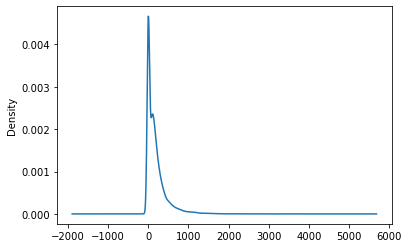

In [83]:
data_all.loc[(~data_all['duration'].isnull()), 'duration'].astype(int).plot.kde()

In [106]:
duration_mean = data_all.loc[~data_all['duration'].isnull(), 'duration'].astype(int).mean()
duration_std = data_all.loc[~data_all['duration'].isnull(), 'duration'].astype(int).std()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
45302   NaN
45303   NaN
45304   NaN
45305   NaN
45306   NaN
Name: duration_simple, Length: 45307, dtype: float64

In [108]:
def duration_handle(duration):
    if duration != duration:
        return duration
    if int(duration) > duration_std * 3 + duration_mean:
        return duration_std * 3 + duration_mean
    return duration
data_all['duration_simple'] = data_all['duration'].apply(lambda duration: duration_handle(duration))
data_all['duration_simple']

0        261
1        149
2        NaN
3        151
4          0
        ... 
45302    NaN
45303      0
45304      0
45305    NaN
45306    NaN
Name: duration_simple, Length: 45307, dtype: object

In [117]:
column_mapping_str(data_all, col_name='campaign', prefix_name='campaign', data_name='data_all', begin_idx=0)
data_all[(data_all['campaign'].isnull()) & ~(data_all['contact'].isnull())]

------------campaign每个项的分布--------------
1     14510
2      8763
3      4383
4      2181
5      1325
6       812
7       517
8       332
9       236
10      183
11      138
12      107
13       80
14       56
17       54
16       40
15       37
18       23
20       23
21       21
19       20
22       13
23       13
24       11
29        9
27        9
26        7
28        6
25        6
35        5
30        5
31        4
34        3
32        2
43        2
33        2
41        1
56        1
37        1
39        1
Name: campaign, dtype: int64
--------------------------------------
mapping_campaign = {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '17': 14, '16': 15, '15': 16, '18': 17, '20': 18, '21': 19, '19': 20, '22': 21, '23': 22, '24': 23, '29': 24, '27': 25, '26': 26, '28': 27, '25': 28, '35': 29, '30': 30, '31': 31, '34': 32, '32': 33, '43': 34, '33': 35, '41': 36, '56': 37, '37': 38, '39': 39}
data_all['

,age,job,marital,education,default,housing,loan,contact,month_x,day_of_week,...,job_simple,marital_simple,marital_simple2,education_simple,poutcome_simple,housing_simple,loan_simple,contact_simple,day_of_week_simple,duration_simple
0,NaN,housemaid,married,basic.4y,NaN,no,NaN,telephone,may,NaN,...,2.0,0.0,0.0,1.0,0,0,0,1.0,0,261
19,39,NaN,single,NaN,NaN,no,no,telephone,may,NaN,...,NaN,1.0,1.0,NaN,0,0,0,1.0,0,195
26,NaN,technician,NaN,NaN,no,yes,no,telephone,NaN,mon,...,1.0,NaN,NaN,NaN,0,1,0,1.0,1,93
37,52,technician,NaN,basic.9y,NaN,yes,no,telephone,may,mon,...,1.0,NaN,0.0,1.0,0,1,0,1.0,1,NaN
42,38,NaN,single,NaN,no,no,no,telephone,NaN,mon,...,NaN,1.0,1.0,NaN,0,0,0,1.0,1,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45280,30,blue-collar,single,high.school,no,NaN,no,telephone,jul,wed,...,1.0,1.0,1.0,2.0,0,0,0,1.0,3,71
45289,NaN,entrepreneur,single,university.degree,no,yes,no,cellular,jul,mon,...,0.0,1.0,1.0,3.0,0,1,0,2.0,1,88
45293,47,housemaid,married,basic.4y,NaN,yes,no,telephone,jul,tue,...,2.0,0.0,0.0,1.0,0,1,0,1.0,2,NaN
45299,NaN,technician,NaN,NaN,no,no,yes,cellular,jun,NaN,...,1.0,NaN,NaN,NaN,0,0,1,2.0,0,NaN


In [115]:
data_all['campaign'].isnull().sum()



11365